In [25]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import RandomOverSampler

In [26]:
df = pd.read_csv('./data/sample.csv')

In [27]:
df

,action_taken_name,agency_name,applicant_ethnicity_name,applicant_race_name_1,applicant_sex_name,applicant_income_000s,co_applicant_ethnicity_name,co_applicant_race_name_1,co_applicant_sex_name,county_name,...,owner_occupancy_name,preapproval_name,property_type_name,purchaser_type_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population
0,Application denied by financial institution,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Female,176.0,No co-applicant,No co-applicant,No co-applicant,Chautauqua County,...,Not owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,235,2605.0,930.0,6.850000,2979.0
1,Application withdrawn by applicant,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,53.0,No co-applicant,No co-applicant,No co-applicant,Erie County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,69000.0,108,2053.0,821.0,33.580002,4416.0
2,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Male,223.0,Not Hispanic or Latino,White,Female,Queens County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,659,497.0,387.0,49.959999,1363.0
3,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,Asian,Female,43.0,No co-applicant,No co-applicant,No co-applicant,Queens County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,71300.0,103,251.0,558.0,32.090000,1960.0
4,Loan originated,National Credit Union Administration,Not Hispanic or Latino,White,Male,72.0,No co-applicant,No co-applicant,No co-applicant,Steuben County,...,Owner-occupied as a principal dwelling,Preapproval was requested,One-to-four family dwelling (other than manufa...,Loan was not originated or was not sold in cal...,60000.0,45,1514.0,1003.0,2.120000,3391.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175857,Loan originated,Consumer Financial Protection Bureau,Not Hispanic or Latino,White,Female,118.0,No co-applicant,No co-applicant,No co-applicant,Nassau County,...,Owner-occupied as a principal dwelling,Preapproval was requested,One-to-four family dwelling (other than manufa...,Affiliate institution,109000.0,300,1470.0,1337.0,17.110001,4448.0
175858,Loan originated,Department of Housing and Urban Development,Not Hispanic or Latino,White,Female,27.0,No co-applicant,No co-applicant,No co-applicant,Monroe County,...,Owner-occupied as a principal dwelling,Preapproval was not requested,One-to-four family dwelling (other than manufa...,"Life insurance company, credit union, mortgage...",69700.0,88,1719.0,1490.0,16.040001,4658.0
175859,Loan originated,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,215.0,Not Hispanic or Latino,White,Female,Nassau County,...,Owner-occupied as a principal dwelling,Preapproval was not requested,One-to-four family dwelling (other than manufa...,Fannie Mae (FNMA),109000.0,205,1547.0,1455.0,7.730000,4671.0
175860,Loan originated,Department of Housing and Urban Development,Not Hispanic or Latino,White,Male,116.0,No co-applicant,No co-applicant,No co-applicant,Rockland County,...,Owner-occupied as a principal dwelling,Not applicable,One-to-four family dwelling (other than manufa...,Freddie Mac (FHLMC),71300.0,200,1743.0,1534.0,19.969999,5484.0


In [28]:
# Overview over null values

null_df = pd.DataFrame({'Null_Values': df.isna().sum(), 'Percentage': round((df.isna().sum())/(df.shape[0])*(100),2)}).reset_index()
null_df

,index,Null_Values,Percentage
0,action_taken_name,0,0.00
1,agency_name,0,0.00
2,applicant_ethnicity_name,0,0.00
3,applicant_race_name_1,0,0.00
4,applicant_sex_name,0,0.00
5,applicant_income_000s,24518,13.94
6,co_applicant_ethnicity_name,0,0.00
7,co_applicant_race_name_1,0,0.00
8,co_applicant_sex_name,0,0.00
9,county_name,485,0.28


In [29]:
# Creating a column with 1 for any kind of loan approval and 0 for all loan denials and file closures.

df['loan_approved'] = np.where(
   (df.action_taken_name == 'Loan originated') | (df.action_taken_name == 'Loan purchased by the institution') | (df.action_taken_name == 'Application approved but not accepted'), 1, 0)

In [30]:
# Filling null values 

df.county_name = df.county_name.fillna('No information')
df.msamd_name = df.msamd_name.fillna('No information')
df.denial_reason_name_1 = df.denial_reason_name_1.fillna(0)
df.denial_reason_name_2 = df.denial_reason_name_2.fillna(0)
df.denial_reason_name_3 = df.denial_reason_name_3.fillna(0)
df.applicant_income_000s = df.applicant_income_000s.fillna(df.applicant_income_000s.mean()).astype(int)
df.hud_median_family_income = df.hud_median_family_income.fillna(df.hud_median_family_income.mean()).astype(int)
df.minority_population = df.minority_population.fillna(df.minority_population.mean())
df.number_of_1_to_4_family_units = df.number_of_1_to_4_family_units.fillna(df.number_of_1_to_4_family_units.mean()).astype(int)
df.number_of_owner_occupied_units = df.number_of_owner_occupied_units.fillna(df.number_of_owner_occupied_units.mean()).astype(int)
df.population = df.population.fillna(df.population.mean()).astype(int)

In [31]:
# Converting columns from str to int without typing them as category

df.action_taken_name = df.action_taken_name.map({'Application denied by financial institution': 0, 'Preapproval request denied by financial institution': 1, 'File closed for incompleteness': 2, 'Application withdrawn by applicant': 3, 'Application approved but not accepted': 4, 'Loan purchased by the institution': 5, 'Loan originated': 6})

# Converting columns manually for the same order of information with applicant and co-applicant, labelling them astype('category)

df.applicant_ethnicity_name = df.applicant_ethnicity_name.map({'Information not provided by applicant in mail, Internet, or telephone application': 0, 'Not Hispanic or Latino': 1, 'Hispanic or Latino': 2, 'Not applicable': 3}).astype('category')
df.applicant_race_name_1 = df.applicant_race_name_1.map({'Information not provided by applicant in mail, Internet, or telephone application': 0, 'White': 1, 'Asian': 2, 'Black or African American': 3, 'American Indian or Alaska Native': 4, 'Native Hawaiian or Other Pacific Islander': 5, 'Not applicable': 6}).astype('category')
df.applicant_sex_name = df.applicant_sex_name.map({'Information not provided by applicant in mail, Internet, or telephone application': 0, 'Female': 1, 'Male': 2, 'Not applicable': 3}).astype('category')
df.co_applicant_ethnicity_name = df.co_applicant_ethnicity_name.map({'Information not provided by applicant in mail, Internet, or telephone application': 0, 'Not Hispanic or Latino': 1, 'Hispanic or Latino': 2, 'Not applicable': 3, 'No co-applicant': 4}).astype('category')
df.co_applicant_race_name_1 = df.co_applicant_race_name_1.map({'Information not provided by applicant in mail, Internet, or telephone application': 0, 'White': 1, 'Asian': 2, 'Black or African American': 3, 'American Indian or Alaska Native': 4, 'Native Hawaiian or Other Pacific Islander': 5, 'Not applicable': 6, 'No co-applicant': 7}).astype('category')
df.co_applicant_sex_name = df.co_applicant_sex_name.map({'Information not provided by applicant in mail, Internet, or telephone application': 0, 'Female': 1, 'Male': 2, 'Not applicable': 3, 'No co-applicant': 4}).astype('category')
df.denial_reason_name_1 = df.denial_reason_name_1.map({0: 0, 'Collateral': 1, 'Debt-to-income ratio': 2, 'Credit history': 3, 'Employment history': 4, 'Other': 5, 'Insufficient cash (downpayment, closing costs)': 6,'Credit application incomplete': 7, 'Unverifiable information': 8, 'Mortgage insurance denied': 9}).astype('category')
df.denial_reason_name_2 = df.denial_reason_name_2.map({0: 0, 'Collateral': 1, 'Debt-to-income ratio': 2, 'Credit history': 3, 'Employment history': 4, 'Other': 5, 'Insufficient cash (downpayment, closing costs)': 6,'Credit application incomplete': 7, 'Unverifiable information': 8, 'Mortgage insurance denied': 9}).astype('category')
df.denial_reason_name_3 = df.denial_reason_name_3.map({0: 0, 'Collateral': 1, 'Debt-to-income ratio': 2, 'Credit history': 3, 'Employment history': 4, 'Other': 5, 'Insufficient cash (downpayment, closing costs)': 6,'Credit application incomplete': 7, 'Unverifiable information': 8, 'Mortgage insurance denied': 9}).astype('category')


In [32]:
# Converting several columns from str to int, labelling some of them astype('category)

column_list = [1, 9, 13, 14, 15, 16, 17, 18, 19, 20, 21]

for i in column_list:
    df.iloc[:,i] = pd.Categorical(df.iloc[:,i], ordered=True).codes
    df.iloc[:,i] = df.iloc[:,i].astype('category')

In [33]:
df.dtypes

action_taken_name                    int64
agency_name                       category
applicant_ethnicity_name          category
applicant_race_name_1             category
applicant_sex_name                category
applicant_income_000s                int32
co_applicant_ethnicity_name       category
co_applicant_race_name_1          category
co_applicant_sex_name             category
county_name                       category
denial_reason_name_1              category
denial_reason_name_2              category
denial_reason_name_3              category
hoepa_status_name                 category
lien_status_name                  category
loan_purpose_name                 category
loan_type_name                    category
msamd_name                        category
owner_occupancy_name              category
preapproval_name                  category
property_type_name                category
purchaser_type_name               category
hud_median_family_income             int32
loan_amount

<AxesSubplot:>

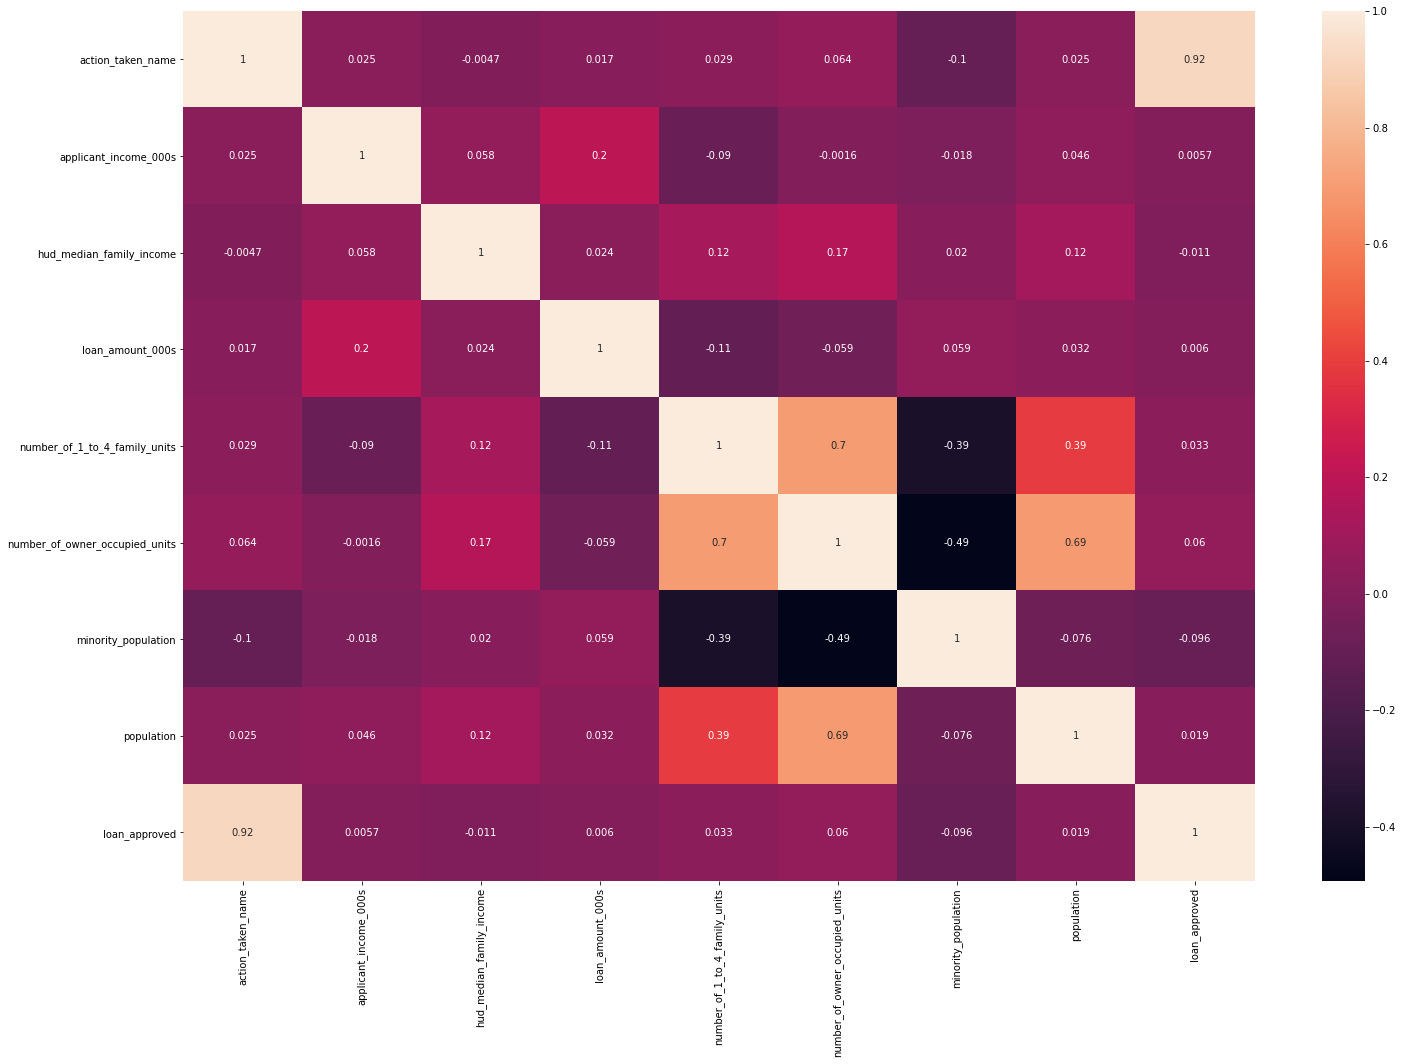

In [34]:
fig, ax = plt.subplots(figsize=(24, 16)) 
sns.heatmap(df.corr(), annot=True, ax = ax)

In [35]:
# How many denied (0) or approved (1) loans does the dataset contain?

print('Distribution: loan is approved (1) or denied (0): \n' + str(pd.Series(y).value_counts()))
print('In Percent: \n' + str(pd.Series(y).value_counts() / pd.Series(y).count() * 100))

Distribution: loan is approved (1) or denied (0): 
1    121407
0     54455
dtype: int64
In Percent: 
1    69.03538
0    30.96462
dtype: float64


In [36]:
X = df.drop(['action_taken_name', 'loan_approved'], axis = 1)
y = df['loan_approved']
y = np.array(y)

In [37]:
# Scaling 

X_scaled = StandardScaler().fit_transform(X)

# Training

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 3)

In [39]:
# Logistic Regression
model_lr = LogisticRegression().fit(X_train, y_train)
model_lr_prediction = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, model_lr_prediction)

conf_lr = confusion_matrix(y_test, model_lr_prediction)
clf_report_lr = classification_report(y_test, model_lr_prediction)

print(f"Accuracy Score of Logistic Regression is : {accuracy_lr}")
print(f"Confusion Matrix : \n{conf_lr}")
print(f"Classification Report : \n{clf_report_lr}")

Accuracy Score of Logistic Regression is : 0.8410135104398854
Confusion Matrix : 
[[ 8646  4842]
 [ 2148 28330]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.64      0.71     13488
           1       0.85      0.93      0.89     30478

    accuracy                           0.84     43966
   macro avg       0.83      0.79      0.80     43966
weighted avg       0.84      0.84      0.84     43966



C:\Users\Diana Jaffé\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
kappa_lr = cohen_kappa_score(y_test, model_lr_prediction)
kappa_lr

0.6041718608088442

In [41]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=1500).fit(X_train, y_train)
model_rf_prediction = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, model_rf_prediction)

conf_rf = confusion_matrix(y_test, model_rf_prediction)
clf_report_rf = classification_report(y_test, model_rf_prediction)

print(f"Accuracy Score of Random Forest is : {accuracy_rf}")
print(f"Confusion Matrix : \n{conf_rf}")
print(f"Classification Report : \n{clf_report_rf}")

Accuracy Score of Random Forest is : 0.8976481826866215
Confusion Matrix : 
[[10966  2522]
 [ 1978 28500]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.81      0.83     13488
           1       0.92      0.94      0.93     30478

    accuracy                           0.90     43966
   macro avg       0.88      0.87      0.88     43966
weighted avg       0.90      0.90      0.90     43966



In [42]:
kappa_rf = cohen_kappa_score(y_test, model_rf_prediction)
kappa_rf

0.756625390822372

In [43]:
# Decision Tree
model_dt = tree.DecisionTreeClassifier().fit(X_train, y_train)
model_dt_prediction = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, model_dt_prediction)

conf_dt = confusion_matrix(y_test, model_dt_prediction)
clf_report_dt = classification_report(y_test, model_dt_prediction)

print(f"Accuracy Score of Decision Tree is : {accuracy_dt}")
print(f"Confusion Matrix : \n{conf_dt}")
print(f"Classification Report : \n{clf_report_dt}")

Accuracy Score of Decision Tree is : 0.8619387708683983
Confusion Matrix : 
[[10546  2942]
 [ 3128 27350]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.77      0.78      0.78     13488
           1       0.90      0.90      0.90     30478

    accuracy                           0.86     43966
   macro avg       0.84      0.84      0.84     43966
weighted avg       0.86      0.86      0.86     43966



In [44]:
kappa_dt = cohen_kappa_score(y_test, model_dt_prediction)
kappa_dt

0.6766479946290103

Maximum:  0.9197952218430034
Mean:  0.8814241636674787


<AxesSubplot:>

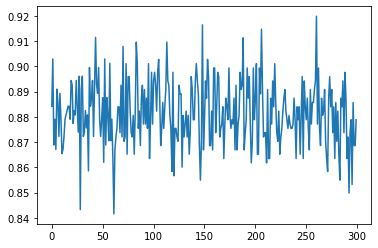

In [45]:
# K-Fold DecisionTree
model_kfdt = cross_val_score(tree.DecisionTreeClassifier(max_depth = 7), X, y, cv=300)
print('Maximum: ', model_kfdt.max())
print('Mean: ', model_kfdt.mean())

model_kfdt = pd.Series(model_kfdt)
model_kfdt.plot()

In [46]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2).fit(X_train, y_train)
model_knn_prediction = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, model_knn_prediction)

conf_knn = confusion_matrix(y_test, model_knn_prediction)
clf_report_knn = classification_report(y_test, model_knn_prediction)

print(f"Accuracy Score of KNN is : {accuracy_knn}")
print(f"Confusion Matrix : \n{conf_knn}")
print(f"Classification Report : \n{clf_report_knn}")

Accuracy Score of KNN is : 0.8408315516535505
Confusion Matrix : 
[[ 9386  4102]
 [ 2896 27582]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.76      0.70      0.73     13488
           1       0.87      0.90      0.89     30478

    accuracy                           0.84     43966
   macro avg       0.82      0.80      0.81     43966
weighted avg       0.84      0.84      0.84     43966



In [47]:
kappa_knn = cohen_kappa_score(y_test, model_knn_prediction)
kappa_knn

0.6162155633207708

In [48]:
# Ada Boost
model_ada = AdaBoostClassifier(n_estimators = 1000).fit(X_train, y_train)
model_ada_prediction = model_ada.predict(X_test)
accuracy_ada = accuracy_score(y_test, model_ada_prediction)

conf_ada = confusion_matrix(y_test, model_ada_prediction)
clf_report_ada = classification_report(y_test, model_ada_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_ada}")
print(f"Confusion Matrix : \n{conf_ada}")
print(f"Classification Report : \n{clf_report_ada}")

Accuracy Score of Ada Boost Classifier is : 0.8924168675794932
Confusion Matrix : 
[[10518  2970]
 [ 1760 28718]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.78      0.82     13488
           1       0.91      0.94      0.92     30478

    accuracy                           0.89     43966
   macro avg       0.88      0.86      0.87     43966
weighted avg       0.89      0.89      0.89     43966



In [49]:
kappa_ada = cohen_kappa_score(y_test, model_ada_prediction)
kappa_ada

0.7405752666098637

In [50]:
# Gradient Boosting Classifier
model_gb = GradientBoostingClassifier().fit(X_train, y_train)
model_gb_prediction = model_gb.predict(X_test)

accuracy_gb = accuracy_score(y_test, model_gb_prediction)
conf_gb = confusion_matrix(y_test, model_gb_prediction)
clf_report_gb = classification_report(y_test, model_gb_prediction)

print(f"Accuracy Score of Gradient Boosting Classifier is : {accuracy_gb}")
print(f"Confusion Matrix : \n{conf_gb}")
print(f"Classification Report : \n{clf_report_gb}")

Accuracy Score of Gradient Boosting Classifier is : 0.8953054633125597
Confusion Matrix : 
[[10750  2738]
 [ 1865 28613]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.80      0.82     13488
           1       0.91      0.94      0.93     30478

    accuracy                           0.90     43966
   macro avg       0.88      0.87      0.87     43966
weighted avg       0.89      0.90      0.89     43966



In [51]:
kappa_gb = cohen_kappa_score(y_test, model_gb_prediction)
kappa_gb

0.7493312210594085

In [52]:
# XgBoost Classifier
model_xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180).fit(X_train, y_train)
model_xgb_prediction = model_xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, model_xgb_prediction)
conf_xgb = confusion_matrix(y_test, model_xgb_prediction)
clf_report_xgb = classification_report(y_test, model_xgb_prediction)

print(f"Accuracy Score of XgBoost Classifier is : {accuracy_xgb}")
print(f"Confusion Matrix : \n{conf_xgb}")
print(f"Classification Report : \n{clf_report_xgb}")

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:48:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score of XgBoost Classifier is : 0.8979438657144156
Confusion Matrix : 
[[10917  2571]
 [ 1916 28562]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.81      0.83     13488
           1       0.92      0.94      0.93     30478

    accuracy                           0.90     43966
   macro avg       0.88      0.87      0.88     43966
weighted avg       0.90      0.90      0.90     43966



In [53]:
kappa_xgb = cohen_kappa_score(y_test, model_xgb_prediction)
kappa_xgb

0.7567641995304736

In [54]:
# Cat Boost Classifier
model_cat = CatBoostClassifier(iterations=100).fit(X_train, y_train)
model_cat_prediction = model_cat.predict(X_test)

accuracy_cat = accuracy_score(y_test, model_cat_prediction)
conf_cat = confusion_matrix(y_test, model_cat_prediction)
clf_report_cat = classification_report(y_test, model_cat_prediction)

print(f"Accuracy Score of Cat Boost Classifier is : {accuracy_cat}")
print(f"Confusion Matrix : \n{conf_cat}")
print(f"Classification Report : \n{clf_report_cat}")

Learning rate set to 0.5
0:	learn: 0.2766464	total: 237ms	remaining: 23.5s
1:	learn: 0.2398610	total: 282ms	remaining: 13.8s
2:	learn: 0.2316277	total: 322ms	remaining: 10.4s
3:	learn: 0.2281718	total: 357ms	remaining: 8.57s
4:	learn: 0.2263181	total: 395ms	remaining: 7.5s
5:	learn: 0.2236330	total: 437ms	remaining: 6.84s
6:	learn: 0.2222105	total: 485ms	remaining: 6.45s
7:	learn: 0.2205193	total: 533ms	remaining: 6.13s
8:	learn: 0.2194089	total: 581ms	remaining: 5.87s
9:	learn: 0.2176777	total: 645ms	remaining: 5.81s
10:	learn: 0.2163871	total: 702ms	remaining: 5.68s
11:	learn: 0.2156611	total: 748ms	remaining: 5.48s
12:	learn: 0.2152188	total: 790ms	remaining: 5.29s
13:	learn: 0.2148818	total: 841ms	remaining: 5.17s
14:	learn: 0.2144775	total: 893ms	remaining: 5.06s
15:	learn: 0.2136884	total: 943ms	remaining: 4.95s
16:	learn: 0.2130589	total: 989ms	remaining: 4.83s
17:	learn: 0.2127217	total: 1.04s	remaining: 4.73s
18:	learn: 0.2121260	total: 1.09s	remaining: 4.63s
19:	learn: 0.2117

In [55]:
kappa_cat = cohen_kappa_score(y_test, model_cat_prediction)
kappa_cat

0.7573217951498016

In [56]:
# Extra Trees Classifier
model_etc = ExtraTreesClassifier().fit(X_train, y_train)
model_etc_prediction = model_etc.predict(X_test)

accuracy_etc = accuracy_score(y_test, model_etc_prediction)
conf_etc = confusion_matrix(y_test, model_etc_prediction)
clf_report_etc = classification_report(y_test, model_etc_prediction)

print(f"Accuracy Score of Extra Trees Classifier is : {accuracy_etc}")
print(f"Confusion Matrix : \n{conf_etc}")
print(f"Classification Report : \n{clf_report_etc}")

Accuracy Score of Extra Trees Classifier is : 0.8888686712459628
Confusion Matrix : 
[[10814  2674]
 [ 2212 28266]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.80      0.82     13488
           1       0.91      0.93      0.92     30478

    accuracy                           0.89     43966
   macro avg       0.87      0.86      0.87     43966
weighted avg       0.89      0.89      0.89     43966



In [57]:
kappa_etc = cohen_kappa_score(y_test, model_etc_prediction)
kappa_etc

0.7362013484078229

In [58]:
# LGBM Classifier
model_lgbm = LGBMClassifier(learning_rate = 1).fit(X_train, y_train)
model_lgbm_prediction = model_lgbm.predict(X_test)

accuracy_lgbm = accuracy_score(y_test, model_lgbm_prediction)
conf_lgbm = confusion_matrix(y_test, model_lgbm_prediction)
clf_report_lgbm = classification_report(y_test, model_lgbm_prediction)

print(f"Accuracy Score of LGBM Classifier is : {accuracy_lgbm}")
print(f"Confusion Matrix : \n{conf_lgbm}")
print(f"Classification Report : \n{clf_report_lgbm}")

Accuracy Score of LGBM Classifier is : 0.882909520993495
Confusion Matrix : 
[[10866  2622]
 [ 2526 27952]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     13488
           1       0.91      0.92      0.92     30478

    accuracy                           0.88     43966
   macro avg       0.86      0.86      0.86     43966
weighted avg       0.88      0.88      0.88     43966



In [59]:
kappa_lgbm = cohen_kappa_score(y_test, model_lgbm_prediction)
kappa_lgbm

0.7241621299662304

In [60]:
# Voting Classifier
classifiers = [('Gradient Boosting Classifier', model_gb), ('Cat Boost Classifier', model_cat), ('XGboost', model_xgb),  
               ('Decision Tree', model_dt), ('Extra Tree', model_etc), ('Light Gradient', model_lgbm), ('Random Forest', model_rf), 
               ('Ada Boost', model_ada), ('Logistic', model_lr), ('Knn', model_knn)]
model_vc = VotingClassifier(estimators = classifiers).fit(X_train, y_train)
model_vc_prediction = model_vc.predict(X_test)

accuracy_vc = accuracy_score(y_test, model_vc_prediction)
conf_vc = confusion_matrix(y_test, model_vc_prediction)
clf_report_vc = classification_report(y_test, model_vc_prediction)

print(f"Accuracy Score of Voting Classifier is : {accuracy_vc}")
print(f"Confusion Matrix : \n{conf_vc}")
print(f"Classification Report : \n{clf_report_vc}")

Learning rate set to 0.5
0:	learn: 0.2766464	total: 50.5ms	remaining: 5s
1:	learn: 0.2398610	total: 89.2ms	remaining: 4.37s
2:	learn: 0.2316277	total: 126ms	remaining: 4.07s
3:	learn: 0.2281718	total: 160ms	remaining: 3.85s
4:	learn: 0.2263181	total: 201ms	remaining: 3.81s
5:	learn: 0.2236330	total: 245ms	remaining: 3.84s
6:	learn: 0.2222105	total: 287ms	remaining: 3.82s
7:	learn: 0.2205193	total: 328ms	remaining: 3.77s
8:	learn: 0.2194089	total: 368ms	remaining: 3.73s
9:	learn: 0.2176777	total: 410ms	remaining: 3.69s
10:	learn: 0.2163871	total: 449ms	remaining: 3.64s
11:	learn: 0.2156611	total: 486ms	remaining: 3.56s
12:	learn: 0.2152188	total: 524ms	remaining: 3.51s
13:	learn: 0.2148818	total: 567ms	remaining: 3.48s
14:	learn: 0.2144775	total: 610ms	remaining: 3.46s
15:	learn: 0.2136884	total: 651ms	remaining: 3.42s
16:	learn: 0.2130589	total: 692ms	remaining: 3.38s
17:	learn: 0.2127217	total: 744ms	remaining: 3.39s
18:	learn: 0.2121260	total: 797ms	remaining: 3.4s
19:	learn: 0.21179

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:50:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Diana Jaffé\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score of Voting Classifier is : 0.900036391757267
Confusion Matrix : 
[[10976  2512]
 [ 1883 28595]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.81      0.83     13488
           1       0.92      0.94      0.93     30478

    accuracy                           0.90     43966
   macro avg       0.89      0.88      0.88     43966
weighted avg       0.90      0.90      0.90     43966



In [61]:
kappa_vc = cohen_kappa_score(y_test, model_vc_prediction)
kappa_vc

0.7618811204384587

In [62]:
# Models Comparison
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'LGBM', 'Voting Classifier', 'K-Fold Decision Tree'],
    'Score' : [accuracy_lr, accuracy_knn, accuracy_dt, accuracy_rf, accuracy_ada, accuracy_gb, accuracy_xgb, accuracy_cat, 
              accuracy_etc, accuracy_lgbm, accuracy_vc, model_kfdt.mean()],
    'Kappa' : [kappa_lr, kappa_knn, kappa_dt, kappa_rf, kappa_ada, kappa_gb, kappa_xgb, kappa_cat, kappa_etc, kappa_lgbm, 
              kappa_vc, model_kfdt.mean()]
})


models.sort_values(by = 'Kappa', ascending = False)

,Model,Score,Kappa
11,K-Fold Decision Tree,0.881424,0.881424
10,Voting Classifier,0.900036,0.761881
7,Cat Boost,0.897830,0.757322
6,XgBoost,0.897944,0.756764
3,Random Forest Classifier,0.897648,0.756625
5,Gradient Boosting Classifier,0.895305,0.749331
4,Ada Boost Classifier,0.892417,0.740575
8,Extra Trees Classifier,0.888869,0.736201
9,LGBM,0.882910,0.724162
2,Decision Tree Classifier,0.861939,0.676648
